데이터 읽기

In [4]:
import os
import pandas as pd

In [5]:
# 사용자 u.user 파일을 읽기
base_src = "C:/Users/Hyungjink/Downloads/ml-100k"
u_user_src = os.path.join(base_src, 'u.user')
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(u_user_src,
                   sep = '|',
                   names = u_cols,
                   encoding = 'latin-1')
users = users.set_index('user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [6]:
# 영화정보 파일 읽기
u_item_src = os.path.join(base_src, 'u.item')
i_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
          'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
           "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
           'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
           'Thriller', 'War', 'Western',]
items = pd.read_csv(u_item_src, 
           sep = '|',
           names = i_cols,
           encoding = 'latin-1')
items = items.set_index('movie_id')
items.head()

,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# 평점데이터 파일 읽기
u_data_src = os.path.join(base_src, "u.data")
d_cols = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(u_data_src,
                  sep = '\t',
                  names = d_cols,
                  encoding = 'latin-1')
ratings.set_index('user_id', inplace = True)
ratings.head()

,item_id,rating,timestamp
user_id,,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596


# 인기제품 추천 방식
* 개별 사용자의 정보가 없을 때 사용할 수 있는 간단한 추천 방식
* Best-Seller 제품을 추천해준다고 생각하면 이해가 쉽다
* 모든 제품 평가의 평균을 내서 평균이 높은 제품을 추천

In [8]:
rating_means = ratings.groupby('item_id')['rating'].mean()
r_movie_id = rating_means.sort_values(ascending = False)[:5].index
items.loc[r_movie_id]

,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599,Someone Else's America (1995),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Someone%20Els...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Marlene%20Die...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Entertaining%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def recom_movies(n_movies):
    rating_means = ratings.groupby('item_id')['rating'].mean()
    r_movie_id = rating_means.sort_values(ascending = False)[:n_movies].index
    result = items.loc[r_movie_id]
    return result['movie_title']

recom_movies(5)

item_id
814                         Great Day in Harlem, A (1994)
1599                        Someone Else's America (1995)
1201           Marlene Dietrich: Shadow and Light (1996) 
1122                       They Made Me a Criminal (1939)
1653    Entertaining Angels: The Dorothy Day Story (1996)
Name: movie_title, dtype: object

RMSE
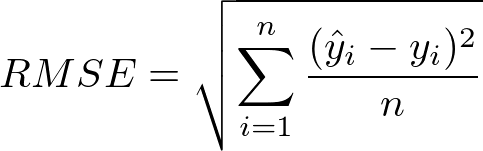

In [10]:
# 100k의 영화 평점에 대해서 실제값과 best-seller 방식으로 구한 예측값의 RMSE를 계산하는 코드
import numpy as np

# RMSE 함수 
def RMSE(y_true, y_pred):
    rmse = np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))
    return rmse

# 정확도 계산 
rmse_list = []
rating_means = ratings.groupby('item_id')['rating'].mean()
for user_id in ratings.index:
    y_true = ratings.loc[user_id]['rating']
    y_pred = rating_means[ratings.loc[user_id]['item_id']]
    rmse = RMSE(y_true, y_pred)
    rmse_list.append(rmse)

# RMSE 계산
print(np.mean(rmse_list))

0.9773699809096448


인기제품 추천 시스템의 RMSE: 0.9773699809096448

## train, test set을 나누어서 추천

* x = 전체 데이터
* y = 점수(rating) 
* x, y을 train, test set으로 분리한다. 

In [32]:
from sklearn.model_selection import train_test_split

x = ratings.copy()
y = ratings.index

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.25,
                                                   stratify = y)

# RMSE 값을 구하는 함수
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

# 모델의 정확도를 측정하는 함수
def score(model):
    id_pairs = zip(x_test.index, x_test['item_id']) # test set에 있는 (사용자 id, 영화 id)
    y_true = np.array(x_test['rating']) # 실제 평점 값
    y_pred = np.array([model(user_id, movie_id) for (user_id, movie_id) in id_pairs]) # 모델로 예측한 평점 값

    return RMSE(y_true, y_pred) # RMSE 계산

def best_seller(user_id, movie_id): # movie id에 해당하는 영화의 평균 평점을 return
    rating_means = x_train.groupby('item_id')['rating'].mean()
    try:
        return rating_means.loc[movie_id]
    except:
        return 3.0

In [33]:
print(score(best_seller))

1.028025823784559


* RMSE: 1.028565860403227
* train, test set을 나눠서 학습했기 때문에 RMSE가 당연히 더 낮게 나옴

## 사용자 집단별 추천

In [34]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


### 성별

In [35]:
user_rating = pd.merge(x_train, users, left_index = True, right_index = True, how = 'inner')
gender_rating = user_rating[['item_id', 'rating', 'gender']].groupby(['item_id', 'gender'])['rating'].mean() # 영화별 성별별 평균 평점

def cf_gender(user_id, movie_id):
    gender = users.loc[user_id]['gender']
    if movie_id in list(set(x_train['item_id'])): # movie id가 train set에 있을 겨웅
        if gender in gender_rating[movie_id].index: # 사용자의 성별집단이 movie id에 대한 평점을 매겼을 경우
            return gender_rating[movie_id][gender]
        else: # 사용자의 성별 집단이 movie id에 대한 평점을 매기지 않았을 경우
            if gender == 'M': # 성별이 남자라면 
                return gender_rating[movie_id]['F'] # 여자의 평균을 return  
            else: # 여자라면 
                return gender_rating[movie_id]['M'] # 남자의 평균을 return 
    else: # train set에 없을 경우 
        return 3.0
    
print(score(cf_gender))

1.0375414893386374


RMSE: 1.0357573106716926
* 성별별 집단으로 나눠서 추천하는 것이 평점 예측에 효과적이지 않음

### 연령대

In [36]:
def get_age_group(age):
    if 1 <= age < 10:
        age_g = '10대 미만'
    elif 10 <= age < 20:
        age_g = '10대'
    elif 20 <= age < 30:
        age_g = '20대'
    elif 30 <= age < 40:
        age_g = '30대'
    elif 40 <= age < 50:
        age_g = '40대'
    elif 50 <= age < 60:
        age_g = '50대'
    elif 60 <= age < 70:
        age_g = '60대'
    else:
        age_g = '70대'
    return age_g

# CF 알고리즘

## 기본 CF 알고리즘

In [37]:
x_train

,item_id,rating,timestamp
user_id,,,
145,443,3,882182658
452,780,1,885476356
447,176,4,878856148
130,393,5,876252472
592,255,4,882608915
...,...,...,...
9,479,4,886959343
880,150,4,880166798
532,284,5,893119438


In [38]:
ratings_matrix = x_train.reset_index().pivot(index = 'user_id',
                         columns = 'item_id',
                         values = 'rating')

ratings_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,4.0,3.0,NaN,5.0,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


943명의 유저가 1647개의 영화에 대해 평점을 매긴 Matrix

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(ratings_matrix.fillna(0), ratings_matrix.fillna(0))
user_similarity = pd.DataFrame(user_similarity, 
                         index = ratings_matrix.index,
                         columns = ratings_matrix.index)
user_similarity

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.118138,0.028516,0.065817,0.254866,0.330190,0.324040,0.219636,0.077229,0.281260,...,0.258102,0.077285,0.178599,0.151325,0.142270,0.065582,0.222515,0.120126,0.095882,0.310425
2,0.118138,1.000000,0.061870,0.207529,0.000000,0.188883,0.089583,0.073593,0.091302,0.141000,...,0.109837,0.253879,0.250789,0.333653,0.239590,0.135344,0.211521,0.112880,0.133495,0.065267
3,0.028516,0.061870,1.000000,0.296221,0.026872,0.066894,0.046046,0.088117,0.022414,0.051832,...,0.027591,0.037059,0.102950,0.010239,0.081266,0.000000,0.125422,0.082069,0.099136,0.033801
4,0.065817,0.207529,0.296221,1.000000,0.000000,0.080604,0.079125,0.114035,0.060862,0.066040,...,0.031217,0.050314,0.114514,0.208514,0.122215,0.000000,0.201878,0.203745,0.120728,0.062937
5,0.254866,0.000000,0.026872,0.000000,1.000000,0.169187,0.313062,0.189672,0.013789,0.166249,...,0.205579,0.045597,0.037306,0.040593,0.056405,0.028402,0.220636,0.065716,0.150317,0.227752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.065582,0.135344,0.000000,0.000000,0.028402,0.064647,0.095775,0.102748,0.000000,0.078818,...,0.063005,0.317337,0.180624,0.232465,0.378073,1.000000,0.023661,0.059663,0.000000,0.134207
940,0.222515,0.211521,0.125422,0.201878,0.220636,0.269348,0.235854,0.160277,0.055141,0.248890,...,0.226258,0.064102,0.140365,0.132238,0.094194,0.023661,1.000000,0.133396,0.223561,0.191551
941,0.120126,0.112880,0.082069,0.203745,0.065716,0.107231,0.045091,0.149849,0.190511,0.091558,...,0.041143,0.196175,0.236747,0.238175,0.216260,0.059663,0.133396,1.000000,0.035837,0.079205


In [44]:
def cf_simple(user_id, movie_id):
    if movie_id in ratings_matrix.columns:
        # 다른 사용자와의 코사인 유사도
        sim = user_similarity[user_id]

        # 다른 사람들이 해당 영화에 매긴 평점 
        ratings = ratings_matrix[movie_id]

        # 해당 영화를 보지 않은 유저 id
        not_rated_user = ratings[ratings.isnull()].index

        # 해당 영화를 보지 않은 유저와의 유사도 drop
        sim = sim.drop(not_rated_user)

        # 해당 영화를 본 사용자들의 평점
        ratings = ratings_matrix[movie_id].dropna()
#         print(f'sim: {sim}')
#         print(f'ratings: {ratings}')
        
        # 평가점수 예측
        prediction = np.dot(sim, ratings) / np.sum(sim)
        
        return prediction 
    
    else:
        return 3.0

In [45]:
print((score(cf_simple)))

1.0212329333118606


RMSE: 1.0232178222153545

## 이웃을 고려한 CF 

In [46]:
# cf knn에 맞게 score함수 새로 정의 
def score(model, neighbor_size = 30): # 기본 neighbor size = 30
    id_pairs = zip(x_test.index, x_test['item_id'])
    y_true = x_test['rating']
    y_pred = [model(user_id, movie_id, neighbor_size) for (user_id, movie_id) in id_pairs] # 모델에 neighbor size를 추가로 넣어준다.

    return RMSE(y_true, y_pred)

In [47]:
def cf_knn(user_id, movie_id, neighbor_size):
    if movie_id in ratings_matrix:
        # 다른 사용자와의 유사도(자기 포함)
        sim = user_similarity[user_id]
        # 해당 영화의 전체 평점
        movie_ratings = ratings_matrix[movie_id]
        # 해당 영화를 보지 않은 사람들의 인덱스
        not_rating_idx = movie_ratings[movie_ratings.isnull()].index
        # 해당 영화 평점의 결측치를 제거 
        movie_ratings = movie_ratings.dropna()
        # 해당 영화를 보지 않은 사람들과의 유사도 제거
        sim = sim.drop(not_rating_idx)
        
        # neighbor size가 2이상일 경우
        if neighbor_size > 1: 
            # neighbor size에 해당하는 유저수 중 작은 수를 neighbor_size로 설정
            neighbor_size = min(neighbor_size, len(sim))
            
            # 사용자와의 유사도가 높은 k명의 인덱스
            # 유사도를 오름차순으로 정렬하고 neighbor size만큼 뒤에서 자름
            neighbor_idx = sim.sort_values()[-neighbor_size:].index

            # k명의 유사도 추출
            neighbor_sim = sim.loc[neighbor_idx]
            #print(neighbor_sim)
            
            # k명의 영화 평점 추출
            neighbor_rating = movie_ratings.loc[neighbor_idx]
            #print(neighbor_rating)
            
            # 예측 평점 
            prediction = np.dot(neighbor_sim, neighbor_rating) / np.sum(neighbor_sim)
            return prediction
        
        # neighbor size가 1과 같거나 작을 경우 
        else:
            return np.dot(sim, movie_ratings) / np.sum(sim) # 전체 사용자와의 유사도로 평점 계산
    else:
        return 3.0

In [48]:
print(score(cf_knn))

1.0143425311678713


* neighbor size = 30
* KNN + CF의 RMSE: 1.0192765538722852

실제 추천

In [49]:
ratings_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,4.0,3.0,NaN,5.0,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
def recom(user_id, n_items, neighbor_size = 30):
    # 해당 유저의 영화에 대한 예측 평점 매트릭스를 만들어야함 
    # 해당 유저가 보지않은 영화의 id 추출
    user_ratings = ratings_matrix.loc[user_id].fillna(0)
    predict_rating_matrix = user_ratings[user_ratings == 0.0].copy()
    for i in predict_rating_matrix.index:
        predict_rating_matrix.loc[i] = cf_knn(user_id, i, neighbor_size)
        
    r_movie_idx = predict_rating_matrix.sort_values(ascending = False)[:n_items].index
    result = items.loc[r_movie_idx]['movie_title']
    return result

In [51]:
recom(2, 10)

item_id
1189                                   Prefontaine (1997)
1122                       They Made Me a Criminal (1939)
1389                                         Mondo (1996)
1467                 Saint of Fort Washington, The (1993)
1500                            Santa with Muscles (1996)
1653    Entertaining Angels: The Dorothy Day Story (1996)
1201           Marlene Dietrich: Shadow and Light (1996) 
814                         Great Day in Harlem, A (1994)
1536                                 Aiqing wansui (1994)
1293                                      Star Kid (1997)
Name: movie_title, dtype: object

## 최적의 이웃 크기 결정

In [52]:
# 다양한 neighbor size를 입력하고 결과를 출력 
neighbor_size_list = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]

def get_best_neighbor_size(neighbor_size_list, model):
    for i, neighbor_size in enumerate(neighbor_size_list):
        rmse = score(model, neighbor_size)
        if i == 0: # 첫 번째 neighbor size를 best로 설정
            best = rmse
            best_n_size = neighbor_size
        else:
            if rmse < best:
                best = rmse
                best_n_size = neighbor_size

        print(f'Neighbor size: {neighbor_size}, RMSE: {rmse}')
    print('-' * 15, 'Result', '-'*15)
    print(f'Best neighbor size: {best_n_size}, Best RMSE: {best}')
    return best_n_size, best

In [53]:
get_best_neighbor_size(neighbor_size_list, cf_knn)

Neighbor size: 1, RMSE: 1.0212329333118606
Neighbor size: 5, RMSE: 1.0630111557935351
Neighbor size: 10, RMSE: 1.0301067708161546
Neighbor size: 20, RMSE: 1.0161605249213619
Neighbor size: 30, RMSE: 1.0143425311678713
Neighbor size: 40, RMSE: 1.013893743853469
Neighbor size: 50, RMSE: 1.0144653328050326
Neighbor size: 60, RMSE: 1.015272744746401
Neighbor size: 70, RMSE: 1.0158869626749234
Neighbor size: 80, RMSE: 1.0164835245560477
Neighbor size: 90, RMSE: 1.017131326063595
Neighbor size: 100, RMSE: 1.0178052614589845
Neighbor size: 200, RMSE: 1.0205463614812944
Neighbor size: 300, RMSE: 1.0211796922067427
--------------- Result ---------------
Best neighbor size: 40, Best RMSE: 1.013893743853469


(40, 1.013893743853469)

Neighbor size가 50일 때 RMSE: 1.0181289784170855로 가장 낮다.

## 사용자의 평가경향을 고려한 CF

In [54]:
ratings_mean = ratings_matrix.mean(axis = 1)
ratings_mean

user_id
1      3.715686
2      3.829787
3      2.902439
4      4.277778
5      2.923664
         ...   
939    4.108108
940    3.500000
941    4.000000
942    4.220339
943    3.428571
Length: 943, dtype: float64

In [55]:
ratings_matrix - ratings_mean

,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,-0.829787,1.097561,-1.277778,NaN,1.373418,-0.019868,-2.795455,0.6875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.284314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.195652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-0.829787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,-2.277778,NaN,NaN,-0.019868,1.204545,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,1.284314,NaN,NaN,NaN,NaN,NaN,-0.019868,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
movie_id = 1
ratings_matrix[movie_id] - ratings_mean

user_id
1           NaN
2      0.170213
3           NaN
4           NaN
5           NaN
         ...   
939         NaN
940         NaN
941    1.000000
942         NaN
943         NaN
Length: 943, dtype: float64

In [57]:
# 사용자 평가 경향을 고려한 함수
def cf_knn_mean(user_id, movie_id, neighbor_size = 0):
    # 각 사용자의 평균 평점
    ratings_mean = ratings_matrix.mean(axis = 1)
    
    # 해당 영화가 train set에 있는 경우
    if movie_id in ratings_matrix:
        # 해당 사용자와의 유사도
        sim = user_similarity[user_id]
        
        # 해당 영화의 평점 평균 편차
        ratings_bias = ratings_matrix[movie_id] - ratings_mean
        
        # 해당 영화에 평점을 매기지 않은 사용자의 index
        not_rated_idx = ratings_bias[ratings_bias.isnull()].index
        
        # 해당 영화의 평점 중 null 제외
        ratings_bias = ratings_bias.dropna()
        
        # 해당 사용자와의 유사도 matrix에서 해당 영화를 보지 않은 사용자의 유사도 제외 
        sim = sim.drop(not_rated_idx)
        
        # neighbor size가 2 이상일 경우 
        if neighbor_size > 1:
            # 사용자 이외에 해당 영화에 평점을 매긴 사람이 없을 경우
            if len(ratings_bias) == 0:
                # 사용자 평점의 평균을 return 
                return ratings_mean[user_id]
            
            # neighbor size와 유사도 행렬과의 길이 중 더 짧은 것을 neighbor size로 결정
            neighbor_size = min(len(sim), neighbor_size)
            # neighbor size만큼 사용자와 유사한 이웃의 index 추출
            neighbor_idx = sim.sort_values()[-neighbor_size:].index
            
            # 해당 사용자 index의 영화 평균 편차
            ratings_bias = ratings_bias.loc[neighbor_idx]
            
            # 해당 사용자 index의 유사도
            sim = sim.loc[neighbor_idx]
            
            dev_predict = np.dot(sim, ratings_bias) / np.sum(sim)
            return ratings_mean[user_id] + dev_predict
            
        # neighbor size가 1 이하일 경우 
        else:
            # neighbor를 지정하지 않고 예상 평점 return 
            # 평점 편차의 예측값 계산 
            # 평점 편차 * 다른 사용자와의 유사도
            dev_predict = np.dot(sim, ratings_bias) / np.sum(sim)
            
            # 실제 예측값 계산 
            return ratings_mean[user_id] + dev_predict
        
        
    # 해당 영화가 train set에 없는 경우
    else:
        # 해당 사용자가 매긴 전체 영화 평점의 평균을 return 
        return ratings_mean[user_id]

In [58]:
print(score(cf_knn_mean))

0.9471109462898276


knn + cf + 평가성향 RMSE: 0.9470252434639302

In [60]:
get_best_neighbor_size(neighbor_size_list, cf_knn_mean)

Neighbor size: 1, RMSE: 0.955666949103145
Neighbor size: 5, RMSE: 0.9898641295491387
Neighbor size: 10, RMSE: 0.9608238211089223
Neighbor size: 20, RMSE: 0.9488747757488891
Neighbor size: 30, RMSE: 0.9471109462898276
Neighbor size: 40, RMSE: 0.9470540558325061
Neighbor size: 50, RMSE: 0.9475549422340621
Neighbor size: 60, RMSE: 0.9485138008857655
Neighbor size: 70, RMSE: 0.9492610014164143
Neighbor size: 80, RMSE: 0.9499409616587621
Neighbor size: 90, RMSE: 0.9507757151462366
Neighbor size: 100, RMSE: 0.9514894640889816
Neighbor size: 200, RMSE: 0.9547670381269414
Neighbor size: 300, RMSE: 0.9555801273663875
--------------- Result ---------------
Best neighbor size: 40, Best RMSE: 0.9470540558325061


(40, 0.9470540558325061)

Neighbor size가 40일 때 RMSE: 0.9468706818923776로 가장 낮다.

## + 신뢰도 가중 방법
* 신뢰도 = (공통으로 평가한 항목의 수)로 보고 특정 신뢰도 이상인 사용자들과의 유사도만을 사용하는 방법

In [61]:
# 사용자들간 공통으로 평가한 항목의 수를 구해야함
ratings_matrix
# ratings_matrix에서 1.0 이상의 평점은 1.0으로 NaN은 0.0으로 치환
binary_matrix1 = np.array((ratings_matrix > 0).astype('float'))
binary_matrix2 = binary_matrix1.T
counts = np.dot(binary_matrix1, binary_matrix2)
counts = pd.DataFrame(counts, 
                     index = ratings_matrix.index,
                     columns = ratings_matrix.index)
counts

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,204.0,10.0,4.0,5.0,45.0,55.0,81.0,19.0,4.0,44.0,...,43.0,9.0,25.0,11.0,22.0,6.0,29.0,6.0,11.0,51.0
2,10.0,47.0,4.0,6.0,0.0,20.0,11.0,3.0,3.0,10.0,...,8.0,9.0,18.0,12.0,13.0,4.0,12.0,4.0,7.0,4.0
3,4.0,4.0,41.0,7.0,1.0,6.0,6.0,6.0,1.0,5.0,...,2.0,1.0,8.0,2.0,5.0,0.0,8.0,2.0,4.0,2.0
4,5.0,6.0,7.0,18.0,0.0,5.0,7.0,4.0,1.0,3.0,...,1.0,1.0,5.0,5.0,4.0,0.0,8.0,4.0,4.0,3.0
5,45.0,0.0,1.0,0.0,131.0,23.0,62.0,12.0,2.0,22.0,...,30.0,2.0,4.0,2.0,9.0,3.0,19.0,2.0,11.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,6.0,4.0,0.0,0.0,3.0,6.0,11.0,3.0,0.0,5.0,...,5.0,10.0,12.0,6.0,19.0,37.0,1.0,2.0,0.0,9.0
940,29.0,12.0,8.0,8.0,19.0,32.0,35.0,9.0,2.0,29.0,...,23.0,2.0,14.0,6.0,7.0,1.0,80.0,5.0,14.0,15.0
941,6.0,4.0,2.0,4.0,2.0,6.0,4.0,6.0,3.0,4.0,...,2.0,4.0,9.0,6.0,7.0,2.0,5.0,17.0,1.0,3.0


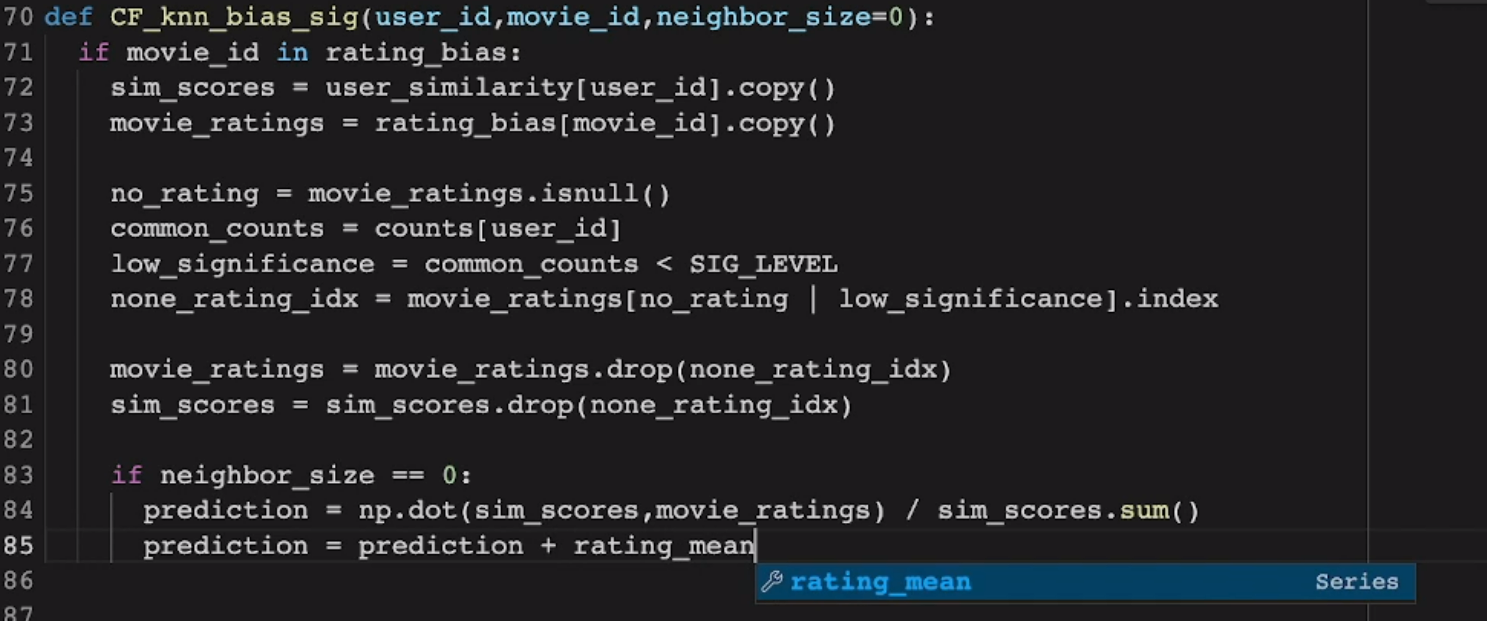

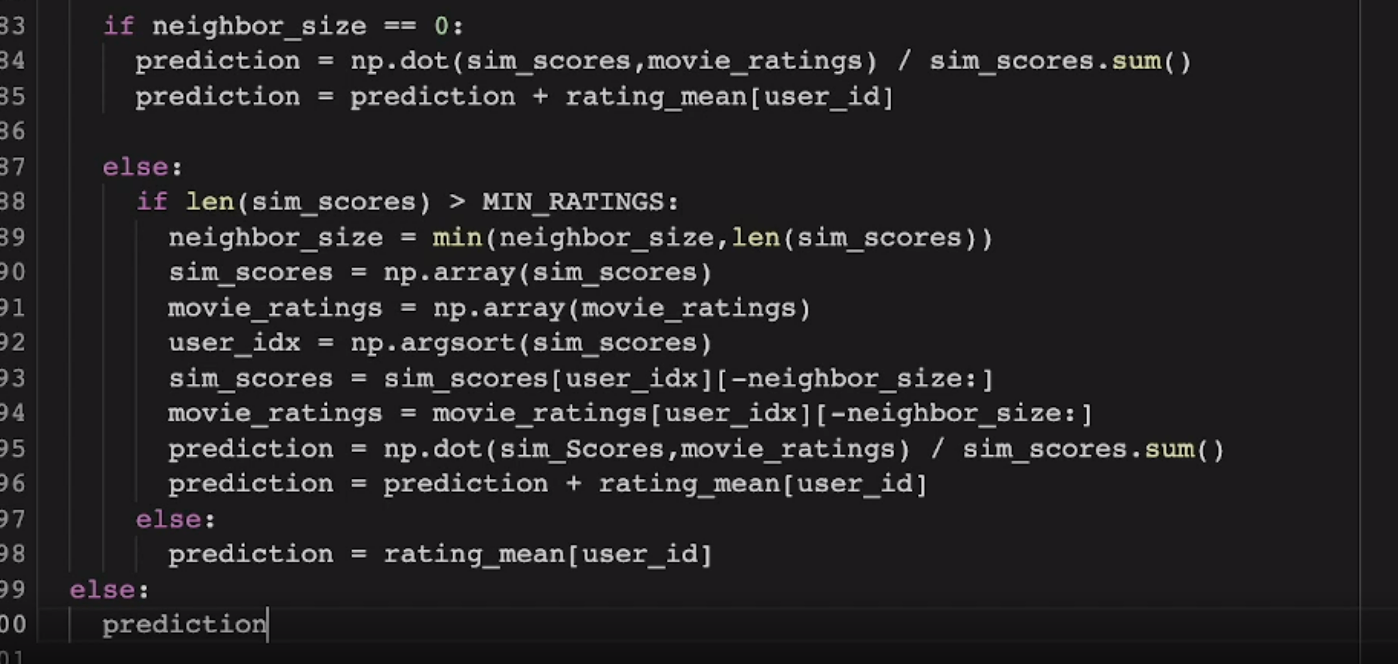

In [63]:
ratings_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,4.0,3.0,NaN,5.0,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
ratings_matrix - ratings_matrix.mean(axis = 1)

,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1676,1677,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,-0.829787,1.097561,-1.277778,NaN,1.373418,-0.019868,-2.795455,0.6875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.284314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.195652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-0.829787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,-2.277778,NaN,NaN,-0.019868,1.204545,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,1.284314,NaN,NaN,NaN,NaN,NaN,-0.019868,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def cf_knn_mean_re(user_id, movie_id, neighbor_size, n_common_movies = 0):
    # 사용자들이 공통으로 매긴 평점의 수 Matrix 
    binary_matrix1 = np.array((ratings_matrix > 0).astype('float'))
    binary_matrix2 = binary_matrix1.T
    counts = np.dot(binary_matrix1, binary_matrix2)
    counts = pd.DataFrame(counts, 
                         index = ratings_matrix.index,
                         columns = ratings_matrix.index)
    
    ratings_mean = ratings_matrix.mean(axis = 1)
    ratings_bias = ratings_matrix - ratings_mean
    
    if movie_id in ratings_bias:
        sim = user_similarity[user_id]
        movie_ratings = ratings_bias[movie_id]
        
        common_counts = counts[user_id]
        low_sig = common_counts < SIG_LEVEL # 공통으로 평가한 영화 항목이 신뢰도 보다 작을 경우 True
        not_rated_idx = movie_ratings[movie_ratings.isnull() | low_sig].index # 해당 영화를 평가하지 않았거나 신뢰도가 낮은 사용자 index 

        movie_ratings = movie_ratings.drop(not_rated_idx)
        sim = sim.drop(not_rated_idx)
        
        if neighbor_size == 0:
            prediction = 
    
    else:
        return 
    

In [ ]:
# 신뢰도 가중 방법에 맞게 score함수 새로 정의 
def score2(model, neighbor_size = 30, n_common_movies = 0): # 기본 neighbor size = 30
    id_pairs = zip(x_test.index, x_test['item_id'])
    y_true = x_test['rating']
    y_pred = [model(user_id, movie_id, neighbor_size, n_common_movies) for (user_id, movie_id) in id_pairs] # 모델에 neighbor size를 추가로 넣어준다.

    return RMSE(y_true, y_pred)

In [ ]:
score2(cf_knn_mean_re)

In [ ]:
n_common_movies = [1, 5, 10, 20, 30]
# 최적의 파라미터를 찾는 함수
def best_params(model, best_neighbor_size, n_common_movies):
    best_n = 0 # 최적의 신뢰도 초기화 
    best_rmse = score2(model, best_neighbor_size)
    for n in n_common_movies: # 신뢰도를 바꿔가면서
        test_rmse = score2(model, best_neighbor_size, n)
        if test_rmse < best_rmse: # 해당 신뢰도의 rmse가 최적이라면
            best_rmse = test_rmse 
            best_n = n
            
        print(f'N common movies: {n}, RMSE: {test_rmse}')
    
    print('-' * 50)
    print(f'Best N common movies: {best_n}, Best RMSE: {best_rmse}')
    # 최적의 신뢰도와 그 때의 rmse를 리턴
    return best_n, best_rmse

In [ ]:
best_params(cf_knn_mean_re, 40, n_common_movies)

In [ ]:
Neighbor size: 1, RMSE: 0.9549322908891918
Neighbor size: 5, RMSE: 0.9925372674207353
Neighbor size: 10, RMSE: 0.9614166329850662
Neighbor size: 20, RMSE: 0.9493582503438556
Neighbor size: 30, RMSE: 0.9470252434639302
Neighbor size: 40, RMSE: 0.9468706818923776
Neighbor size: 50, RMSE: 0.9472473434772486
Neighbor size: 60, RMSE: 0.9481022599258213
Neighbor size: 70, RMSE: 0.9488063765955332
Neighbor size: 80, RMSE: 0.9496305397081942
Neighbor size: 90, RMSE: 0.9505957024834409
Neighbor size: 100, RMSE: 0.9512702763747167
Neighbor size: 200, RMSE: 0.9542401606816133
Neighbor size: 300, RMSE: 0.954869934336155

In [ ]:
ratings_matrix

In [ ]:
ratings_matrix_T = ratings_matrix.T
ratings_matrix_T

In [ ]:
matrix_dummy = ratings_matrix_T.fillna(0)
item_similarity = cosine_similarity(matrix_dummy, matrix_dummy)
item_similarity = pd.DataFrame(item_similarity, 
                              index = ratings_matrix_T.index,
                              columns = ratings_matrix_T.index)

In [ ]:
item_similarity

In [ ]:
x_test

In [ ]:
def score_ibcf(model):
    id_pairs = zip(x_test.index, x_test['item_id'])
    y_true = x_test['rating']
    y_pred = [model(user_id, movie_id) for (user_id, movie_id) in id_pairs]
    return RMSE(y_true, y_pred)

In [ ]:
def IBCF(user_id, movie_id):
    # 해당 유저가 train set에 있을 경우
    if user_id in ratings_matrix_T.columns:
        # 모든 영화에 대해 해당 사용자가 매긴 평점
        user_ratings = ratings_matrix_T[user_id]
        
        # 해당 영화와 모든 영화들간의 유사도
        sim = item_similarity[movie_id]
        
        # 해당 사용자가 평점을 매기지 않은 영화의 index
        not_rated_idx = user_ratings[user_ratings.isnull()].index
        
        # 평점과 유사도를 필터링
        sim = sim.drop(not_rated_idx)
        user_ratings = user_ratings.dropna()
        
        # 예측평점 계산
        prediction = np.dot(sim, user_ratings) / np.sum(sim)
        return prediction
    else:
        return 3.0

In [ ]:
score_ibcf(IBCF)

In [ ]:
ratings_matrix_T